# Imports

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

%matplotlib inline

# 1. YOLO v11 model

## 1.1 Configuration

In [2]:
device = 0 if torch.cuda.is_available() else 'cpu'
configuration_file = os.path.join(os.path.dirname(os.getcwd()), 'data', 'yalo_configuration.yaml')
models_folder = os.path.join(os.path.dirname(os.getcwd()), 'models', 'yalo')

## 1.2 Training model v11s from scratch

In [3]:
# model_v11s = YOLO("yolo11s.pt")  # load the medium model

In [4]:
# Train the model
# results_v11s = model_v11s.train(
#     data=configuration_file,
#     epochs=200,
#     batch=32,
#     device=device, 
#     pretrained=False,
#     project= models_folder,
#     name='v11s_scratch_200epochs',
    
#     translate= 0.2, # Translation of image
#     flipud= 0.5, # flip the image upside down
#     mosaic=0.3 # Combine 4 training images
# )

### Evaluation 

In [3]:
model_v11s = YOLO(os.path.join(models_folder, 'v11s_scratch_200epochs', 'weights', 'best.pt'))

In [6]:
metrics_v11s = model_v11s.val(
    project=models_folder,
    name='v11s_scratch_200epochs_val',
    device=device
)

Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/val/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]


                   all         77         77          1      0.951      0.994      0.917
Speed: 2.0ms preprocess, 5.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/v11s_scratch_200epochs_val2


In [7]:
print(metrics_v11s.box.map)  # mAP50-95
print(metrics_v11s.box.map50)  # mAP50
print(metrics_v11s.box.map75)  # mAP75
print(metrics_v11s.box.maps)  # list of mAP50-95 for each category

0.9173761729203388
0.9938666857443229
0.9780676569406319
[    0.91738]


## 1.3 Training pretrained model v11 large 

In [8]:
# model_v11l = YOLO("yolo11l.pt")  # load the large pretrained model

In [9]:
# Train the model
# results_v11l = model_v11l.train(
#     data=configuration_file,
#     epochs=200,
#     batch=16,
#     device=device, 
#     pretrained=True,
#     project= models_folder,
#     name='v11l_pretrained_200epochs',
    
#     translate= 0.2, # Translation of image
#     flipud= 0.5, # flip the image upside down
#     mosaic=0.3 # Combine 4 training images
# )

### Evaluation of large model

In [33]:
model_v11l = YOLO(os.path.join(models_folder, 'v11l_pretrained_200epochs', 'weights', 'best.pt'))

In [11]:
metrics_v11l = model_v11l.val(
    project=models_folder,
    name='v11l_pretrained_200epochs_val',
    device=device
)

Ultralytics 8.3.56 🚀 Python-3.10.16 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /home/ec2-user/probe_detection/data/yalo/val/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


                   all         77         77      0.972      0.915      0.966      0.855
Speed: 2.0ms preprocess, 17.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/ec2-user/probe_detection/models/yalo/v11l_pretrained_200epochs_val2


In [12]:
print(metrics_v11l.box.map)  # mAP50-95
print(metrics_v11l.box.map50)  # mAP50
print(metrics_v11l.box.map75)  # mAP75
print(metrics_v11l.box.maps)  # list of mAP50-95 for each category

0.855249021345734
0.965999028370855
0.9505193616525133
[    0.85525]


In [13]:
metrics_v11s

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f981a800f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
metrics_v11l

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f97b005e0b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Model Comparaison

## Performance

In [15]:
metrics_v11s.results_dict

{'metrics/precision(B)': 1.0,
 'metrics/recall(B)': 0.9508672483589375,
 'metrics/mAP50(B)': 0.9938666857443229,
 'metrics/mAP50-95(B)': 0.9173761729203388,
 'fitness': 0.9250252242027373}

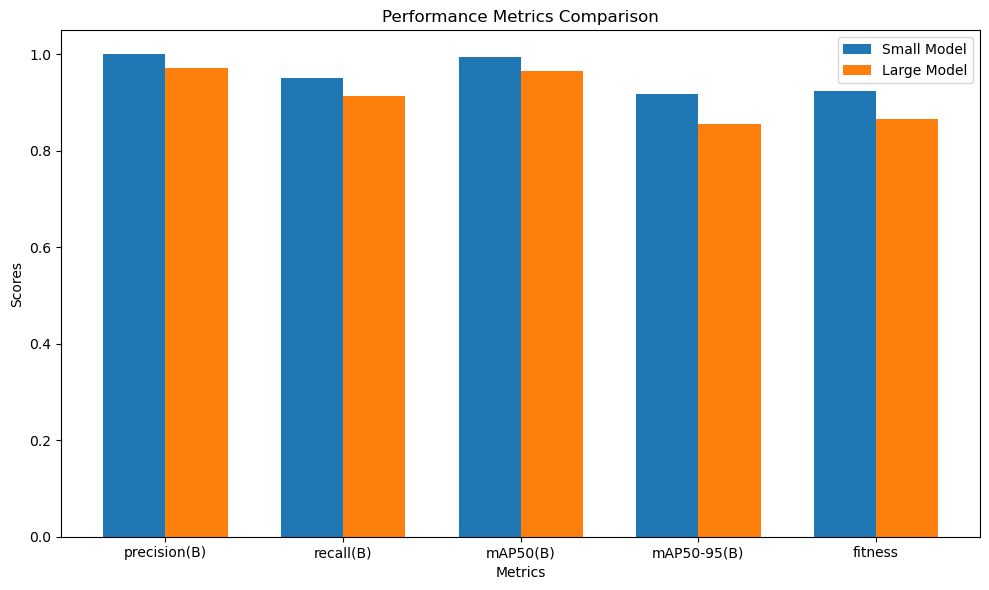

In [20]:
performance_metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness']

performance_data = {
    'Small Model': [metrics_v11s.results_dict[m] for m in performance_metrics],
    'Large Model': [metrics_v11l.results_dict[m] for m in performance_metrics]
}

# Plot Performance Metrics
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(performance_metrics))

for i, (label, data) in enumerate(performance_data.items()):
    ax.bar(index + i * bar_width, data, bar_width, label=label)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([m.split('/')[-1] for m in performance_metrics])
ax.legend()

plt.tight_layout()
plt.show()


## Speed

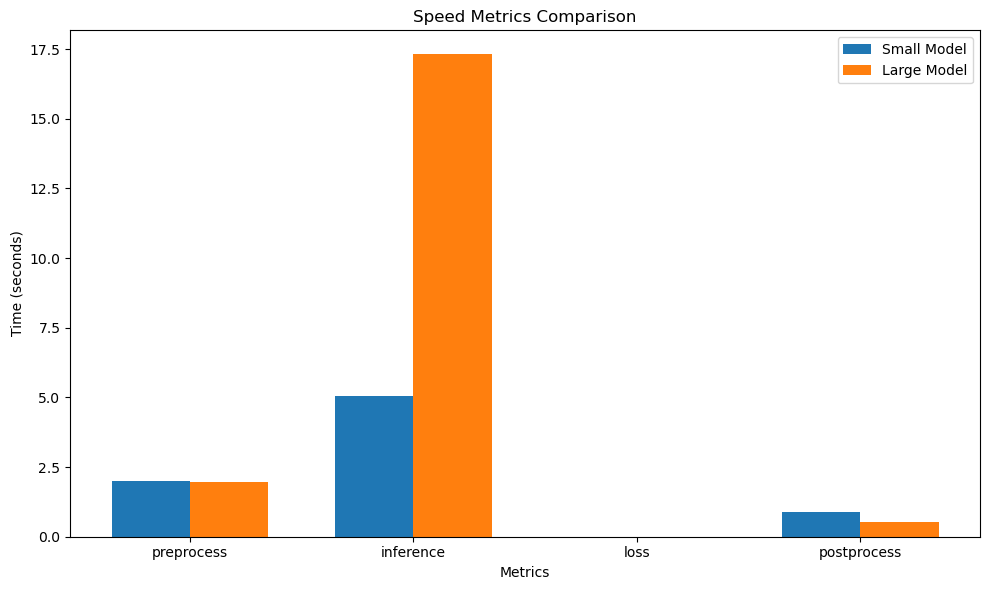

In [21]:
speed_metrics = ['preprocess', 'inference', 'postprocess']
speed_data = {
    'Small Model': [metrics_v11s.speed[m] for m in speed_metrics],
    'Large Model': [metrics_v11l.speed[m] for m in speed_metrics]
}

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(speed_metrics))

for i, (label, data) in enumerate(speed_data.items()):
    ax.bar(index + i * bar_width, data, bar_width, label=label)

ax.set_xlabel('Metrics')
ax.set_ylabel('Time (seconds)')
ax.set_title('Speed Metrics Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(speed_metrics)
ax.legend()

plt.tight_layout()
plt.show()

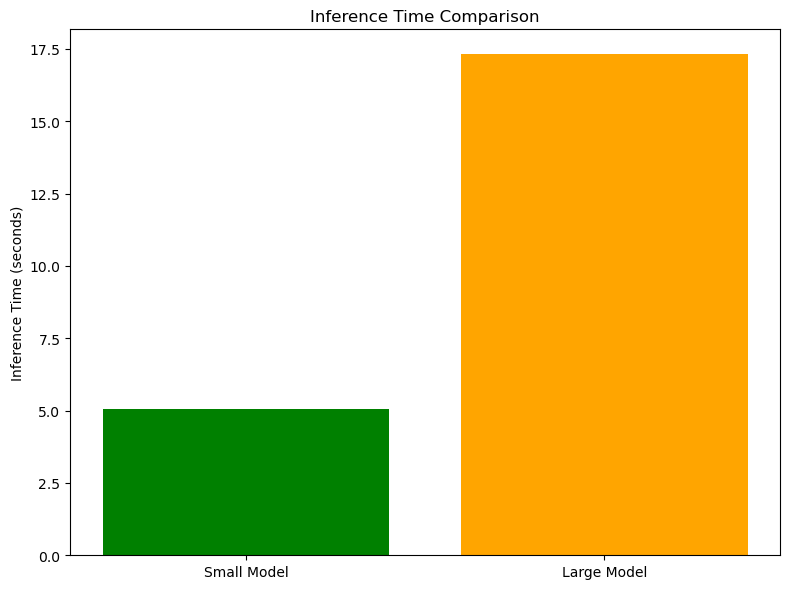

In [23]:
# Calculate percentage increase in inference time
inference_small = metrics_v11s.speed['inference']
inference_large = metrics_v11l.speed['inference']
# percentage_increase = ((inference_large - inference_small) / inference_small) * 100

# Plot Inference Speed Increase
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(['Small Model', 'Large Model'], [inference_small, inference_large], color=['green', 'orange'])

ax.set_ylabel('Inference Time (seconds)')
ax.set_title('Inference Time Comparison')

# Annotate percentage increase
# ax.text(1, inference_large, f'{percentage_increase:.2f}% increase', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Compare Visually the models

In [30]:
def visualiaze_prediction(model):
    results = model.predict(
        source=os.path.join(os.path.dirname(os.getcwd()), 'data', 'yalo', 'test', 'images'), 
        conf=0.7,
        device=device
    )
    
    # Set up the plot
    num_images = len(results)
    cols = 4  # Number of images per row
    rows = (num_images + cols - 1) // cols  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Visualize the results
    for i, r in enumerate(results):
        # Plot results image
        im_bgr = r.plot()  # BGR-order numpy array
            
        # Display the image
        axes[i].imshow(im_bgr)
        axes[i].set_title(f"Prediction {r.path.split('/')[-1]}")
        axes[i].axis('off')  # Hide axes

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

#### YALO v11s


image 1/16 /home/ec2-user/probe_detection/data/yalo/test/images/105.jpg: 416x640 1 metallic_probe, 26.9ms
image 2/16 /home/ec2-user/probe_detection/data/yalo/test/images/159.jpg: 416x640 1 metallic_probe, 14.4ms
image 3/16 /home/ec2-user/probe_detection/data/yalo/test/images/172.jpg: 416x640 1 metallic_probe, 12.1ms
image 4/16 /home/ec2-user/probe_detection/data/yalo/test/images/233.jpg: 416x640 1 metallic_probe, 10.3ms
image 5/16 /home/ec2-user/probe_detection/data/yalo/test/images/245.jpg: 416x640 1 metallic_probe, 11.1ms
image 6/16 /home/ec2-user/probe_detection/data/yalo/test/images/251.jpg: 416x640 1 metallic_probe, 8.8ms
image 7/16 /home/ec2-user/probe_detection/data/yalo/test/images/260.jpg: 416x640 1 metallic_probe, 8.6ms
image 8/16 /home/ec2-user/probe_detection/data/yalo/test/images/276.jpg: 416x640 1 metallic_probe, 8.7ms
image 9/16 /home/ec2-user/probe_detection/data/yalo/test/images/307.jpg: 416x640 1 metallic_probe, 8.7ms
image 10/16 /home/ec2-user/probe_detection/data/y

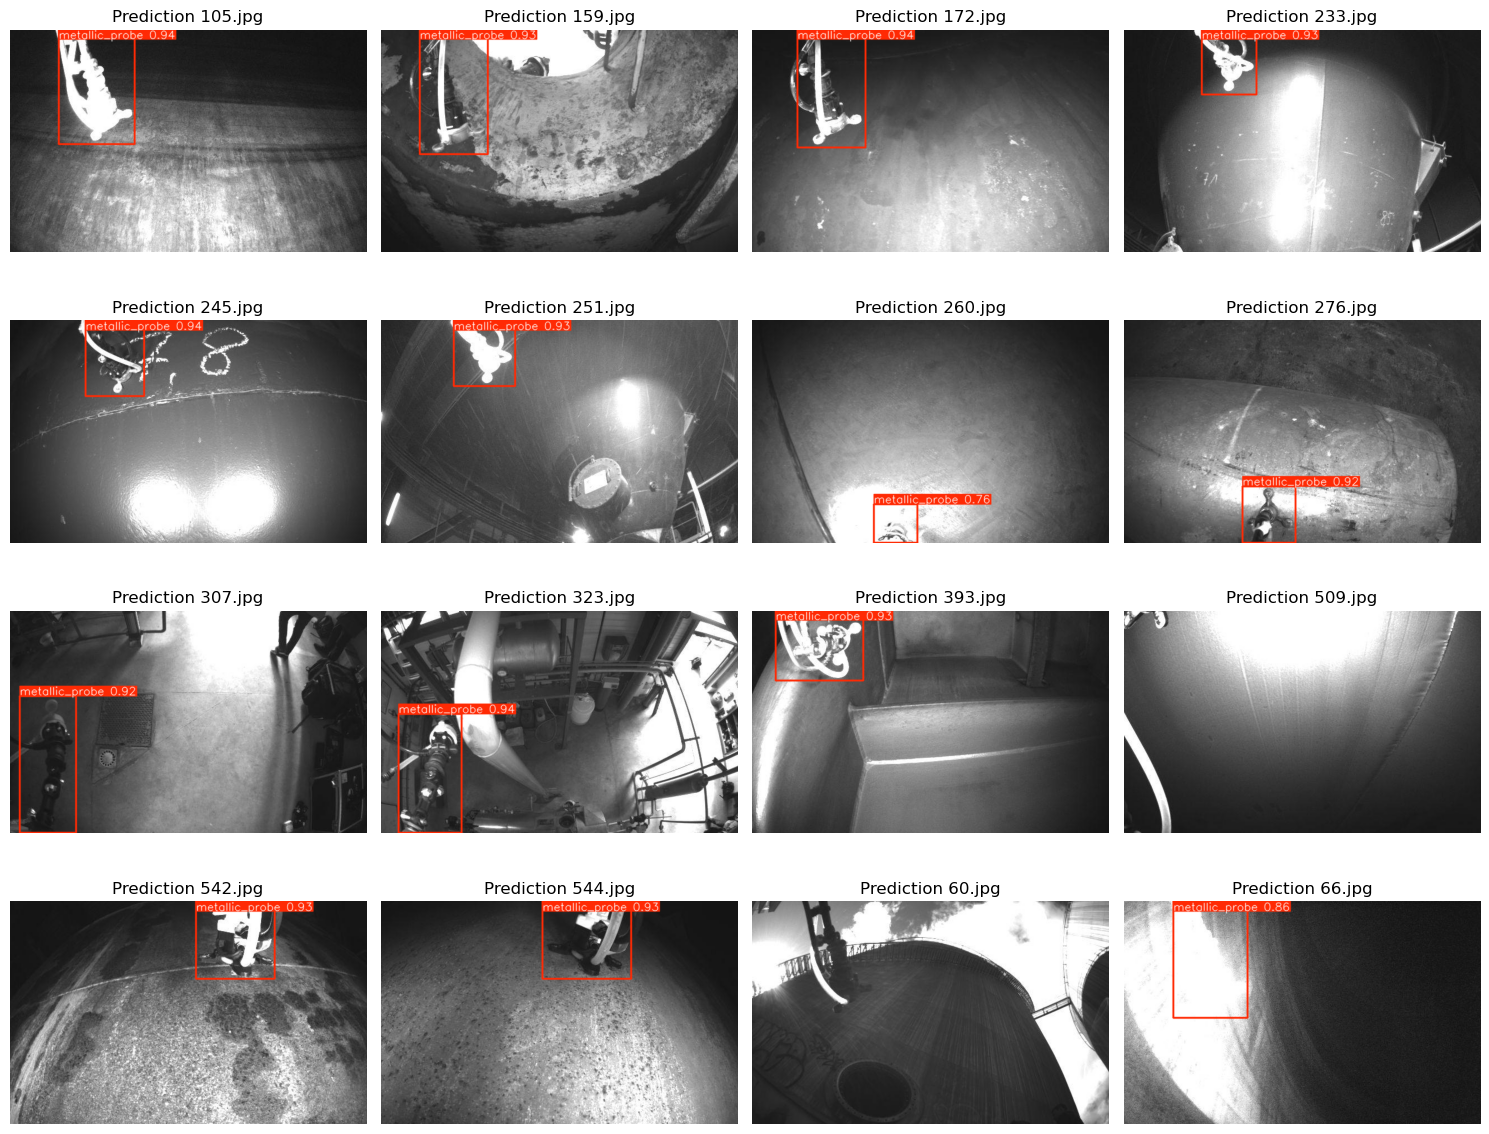

In [31]:
visualiaze_prediction(model=model_v11s)

#### YALO v11L


image 1/16 /home/ec2-user/probe_detection/data/yalo/test/images/105.jpg: 416x640 1 metallic_probe, 37.5ms
image 2/16 /home/ec2-user/probe_detection/data/yalo/test/images/159.jpg: 416x640 2 metallic_probes, 16.1ms
image 3/16 /home/ec2-user/probe_detection/data/yalo/test/images/172.jpg: 416x640 1 metallic_probe, 17.0ms
image 4/16 /home/ec2-user/probe_detection/data/yalo/test/images/233.jpg: 416x640 1 metallic_probe, 17.7ms
image 5/16 /home/ec2-user/probe_detection/data/yalo/test/images/245.jpg: 416x640 1 metallic_probe, 18.0ms
image 6/16 /home/ec2-user/probe_detection/data/yalo/test/images/251.jpg: 416x640 1 metallic_probe, 17.8ms
image 7/16 /home/ec2-user/probe_detection/data/yalo/test/images/260.jpg: 416x640 1 metallic_probe, 17.4ms
image 8/16 /home/ec2-user/probe_detection/data/yalo/test/images/276.jpg: 416x640 1 metallic_probe, 17.2ms
image 9/16 /home/ec2-user/probe_detection/data/yalo/test/images/307.jpg: 416x640 1 metallic_probe, 17.0ms
image 10/16 /home/ec2-user/probe_detection/d

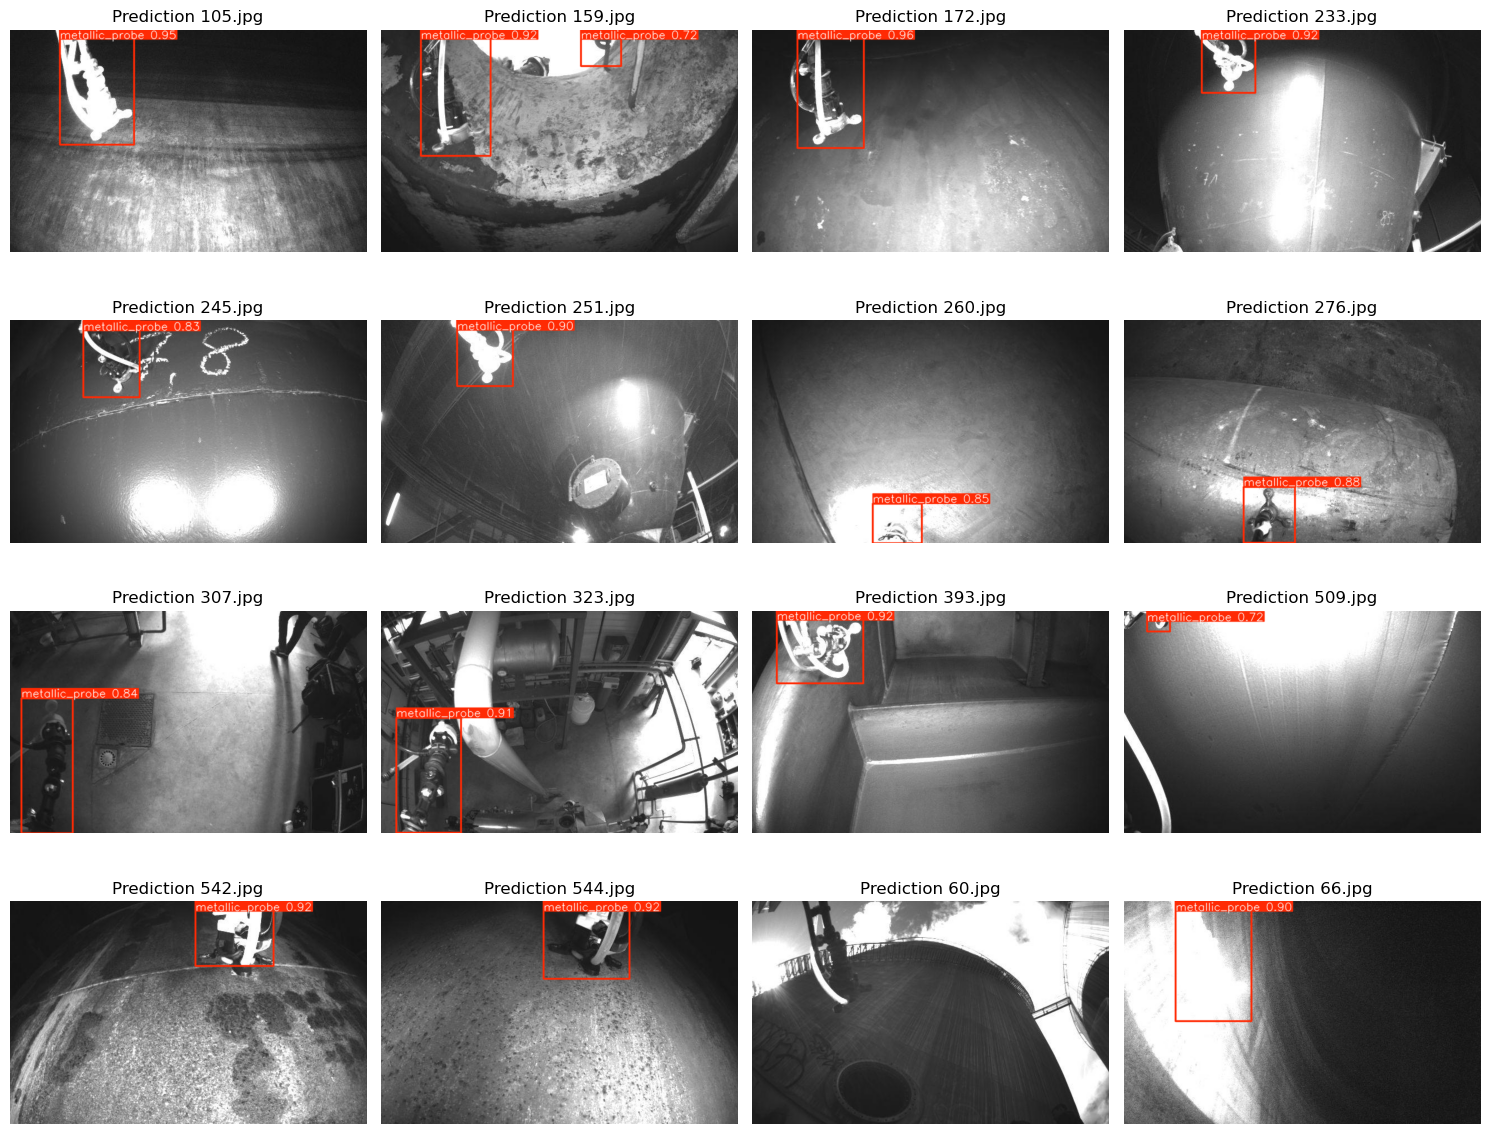

In [34]:
visualiaze_prediction(model=model_v11l)